In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import edhec_risk_kit as erk

ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will create an indice based on market cap of each sector to define the weights that will be attributed

- ind30_m_nfirms file tells how many firms are present in each sector for each month
- ind30_m_size is the average size of each industry for each month

In [3]:
ind_return.shape

(1110, 30)

In [4]:
ind_size.shape

(1110, 30)

In [5]:
ind_nfirms.shape

(1110, 30)

In [6]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


We need to find out the market capitalization of each industry

In [8]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.shape

(1110, 30)

In [9]:
total_mktcap = ind_mktcap.sum(axis='columns')

In [10]:
total_mktcap

1926-07       26657.94
1926-08       27436.34
1926-09       28060.41
1926-10       28057.23
1926-11       27198.40
              ...     
2018-08    29949911.36
2018-09    30990177.46
2018-10    30918505.63
2018-11    28463290.74
2018-12    28851651.12
Freq: M, Length: 1110, dtype: float64

<AxesSubplot:>

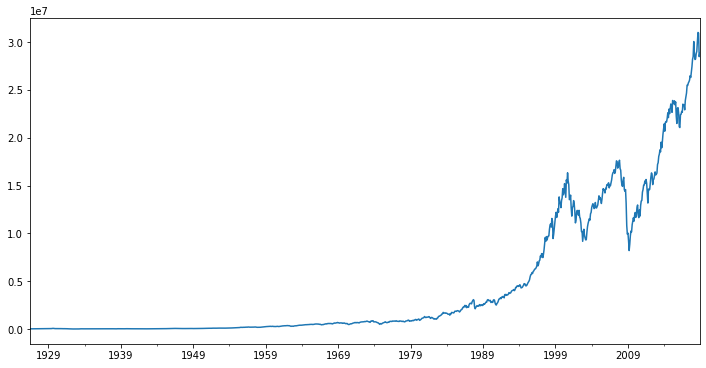

In [12]:
total_mktcap.plot(figsize=(12,6))

Capital weights for each month is simply industry market cap divided by the total market cap at that time

In [33]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis='rows')
ind_capweight

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,0.021873,0.008309,0.008222,0.011997,0.001168,0.014569,0.009720,0.103549,0.017596,0.000616,...,0.039896,0.161042,0.108402,0.010090,0.023453,0.010987,0.076225,0.014317,0.164637,0.047815
2018-09,0.021005,0.007873,0.007515,0.011923,0.001076,0.014427,0.009874,0.104324,0.016954,0.000618,...,0.039669,0.163597,0.114947,0.009675,0.023248,0.010992,0.080234,0.014275,0.162556,0.047549
2018-10,0.020661,0.007862,0.007831,0.011851,0.001052,0.014606,0.010000,0.106363,0.014954,0.000580,...,0.040434,0.163111,0.114711,0.009650,0.023535,0.010681,0.080886,0.014663,0.159464,0.048158
2018-11,0.022649,0.008403,0.009178,0.010810,0.001066,0.015702,0.009761,0.105080,0.014176,0.000467,...,0.043476,0.160187,0.114465,0.009333,0.023064,0.010674,0.078849,0.015642,0.161024,0.049159


Food, in 1926 July, represented 5.8% of the portfolio.

In [15]:
ind_capweight['1926'].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<AxesSubplot:>

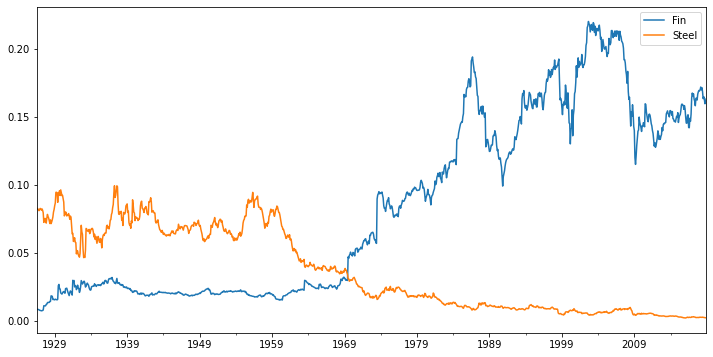

In [16]:
ind_capweight[['Fin', 'Steel']].plot(figsize=(12,6))

Overtime, steel decreased in the portfolio compared to finance.

Now, let's create an indice

In [34]:
total_market_return = (ind_capweight*ind_return).sum(axis='columns')

<AxesSubplot:>

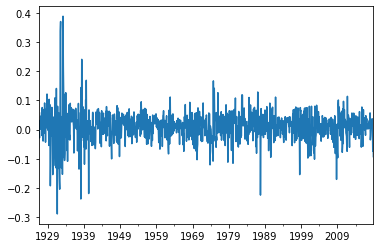

In [36]:
total_market_return.plot()

<AxesSubplot:title={'center':'Total Market Cap Weighted Index 1926-2018'}>

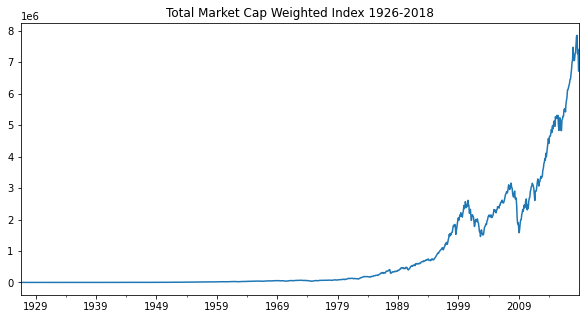

In [39]:
# To create the indice, we need to compound the returns from 1926 to 2018.
# We can use the wealth index we created in the drawdown function.
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(10,5), title='Total Market Cap Weighted Index 1926-2018')

We want to look at how returns are related to market correlation

<AxesSubplot:>

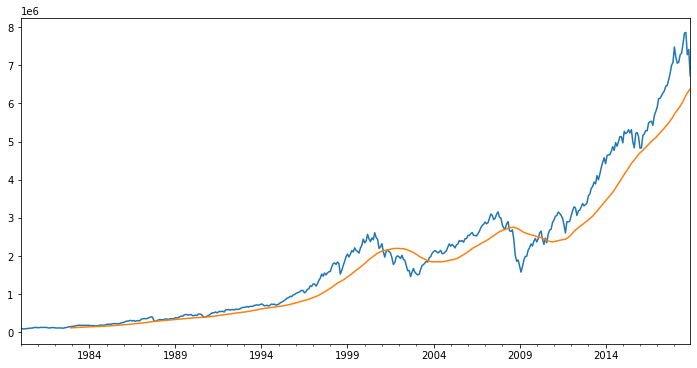

In [42]:
total_market_index['1980':].plot(figsize=(12,6))
# rolling makes use of a time index to produce another time series computed in a window (moving average for example using a mean function)
total_market_index['1980':].rolling(window=36).mean().plot()

<AxesSubplot:>

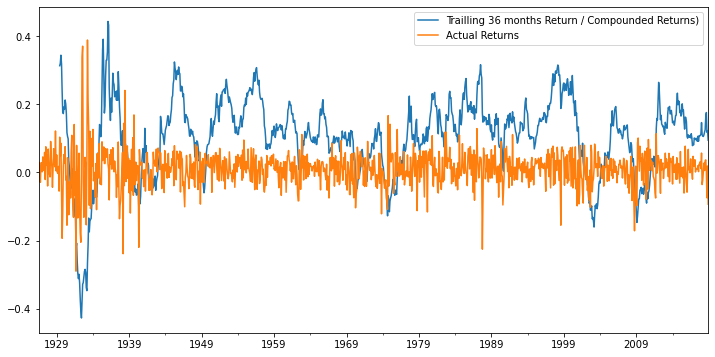

In [48]:
# Total Market Index Trailing 36 months Returns
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6), label='Trailling 36 months Return / Compounded Returns)', legend=True)
total_market_return.plot(label='Actual Returns', legend=True)

### Rolling Correlations - along with MuliIndexes and `.groupby`

In [49]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

For each date, we have a correlation matrix, being therefore a MultiIndex

In [52]:
ts_corr.index.names

FrozenList(['Date', 'Industry'])

In [54]:
ts_corr.index.names = ['Date', 'Industry']
ts_corr.index.names

FrozenList(['Date', 'Industry'])

In [55]:
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
Date    Industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
Date    Industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Date    Industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
Date    Industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [57]:
ind_tr36corr = ts_corr.groupby(level='Date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr.tail()

Date
2018-08    0.416673
2018-09    0.401186
2018-10    0.409397
2018-11    0.403975
2018-12    0.479502
Freq: M, dtype: float64

<AxesSubplot:xlabel='Date'>

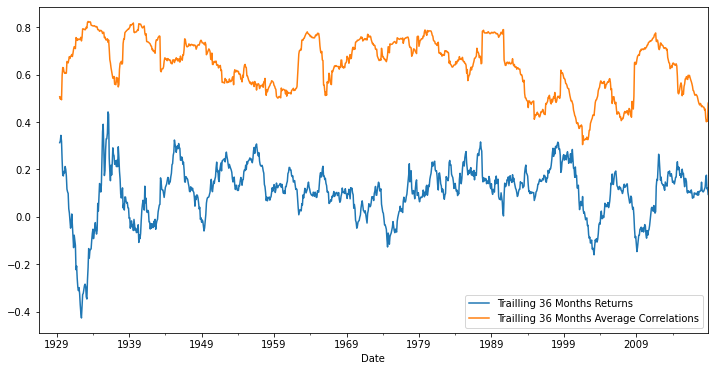

In [58]:
tmi_tr36rets.plot(label='Trailling 36 Months Returns',figsize=(12,6), legend=True)
ind_tr36corr.plot(label='Trailling 36 Months Average Correlations', legend=True)

<AxesSubplot:label='278407c7-ab53-4e12-90ce-1bafd1c5cba8'>

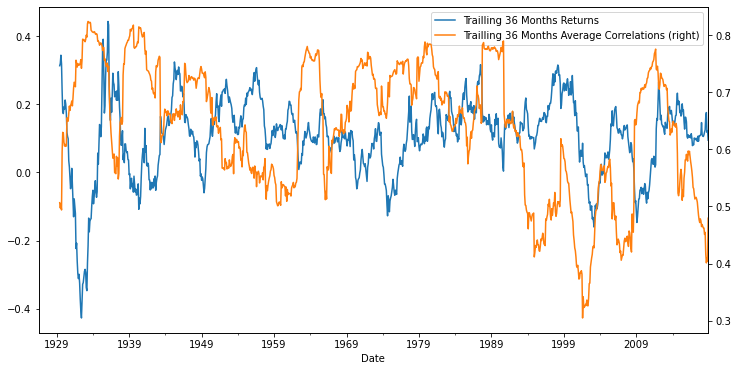

In [62]:
# Units are not the same, since we have returns vs correlations

tmi_tr36rets.plot(label='Trailling 36 Months Returns',figsize=(12,6), legend=True)
ind_tr36corr.plot(label='Trailling 36 Months Average Correlations', legend=True, secondary_y=True)

When Market is raising, correlation is low
When Market is falling, correlation is high

BIG PROBLEM

<AxesSubplot:label='e92c2907-9bc0-47a0-b159-2c7daf57279a'>

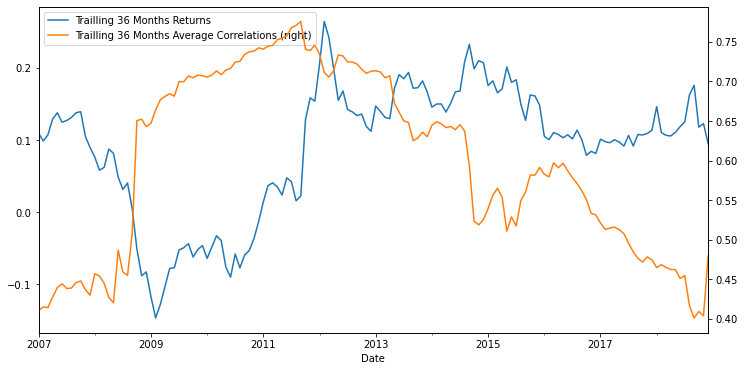

In [63]:
tmi_tr36rets['2007':].plot(label='Trailling 36 Months Returns',figsize=(12,6), legend=True)
ind_tr36corr['2007':].plot(label='Trailling 36 Months Average Correlations', legend=True, secondary_y=True)

Diversification will not help us

In [64]:
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884126

We have a negative correlation between returns and the average correlation